### Importing Necessary Libraris

In [1]:
import os
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
import skimage
import cv2
from skimage.feature import hog
from skimage.feature import local_binary_pattern


### Loading Images `Normal` and `Pnumonia`

In [2]:
data = 'chest_xray/chest_xray/train'

### Image Preprocessing

In [3]:
## Image preprocessing------------------
data_dir = 'chest_xray/chest_xray/train'

img_size = (100, 100)

preprocessed_folder_path = 'preprocessed_images2'

if not os.path.exists(preprocessed_folder_path):
    os.mkdir(preprocessed_folder_path)

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    category_folder_path = os.path.join(preprocessed_folder_path, folder)
    
    if not os.path.exists(category_folder_path):
        os.mkdir(category_folder_path)
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        if image is not None:
            resized_image = cv2.resize(image, img_size)
            gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
         #   normalized_image = cv2.equalizeHist(gray_image)
            preprocessed_image_path = os.path.join(category_folder_path, filename)
            cv2.imwrite(preprocessed_image_path, gray_image)


### Images before preprocessing

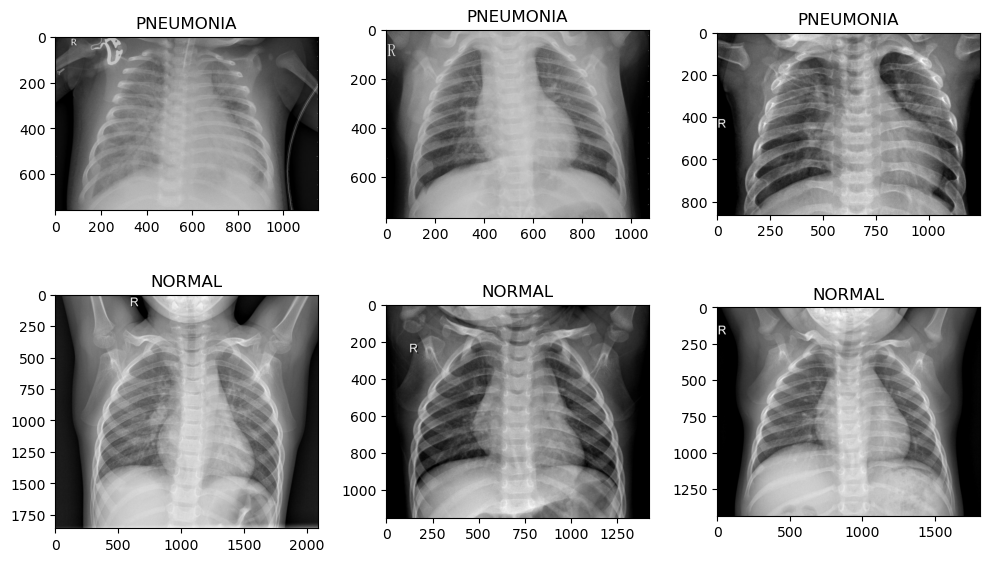

In [ ]:
## printing original images
categories = ['PNEUMONIA', 'NORMAL']  

fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.ravel()

for i, category in enumerate(categories):
    folder_path = os.path.join(data, category)
    
    for j, filename in enumerate(os.listdir(folder_path)):
        if j == 3:  
            break
            
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        axs[i*3+j].imshow(image)
        axs[i*3+j].set_title(category)
        
plt.tight_layout()
plt.show()


### Images after preprocessing

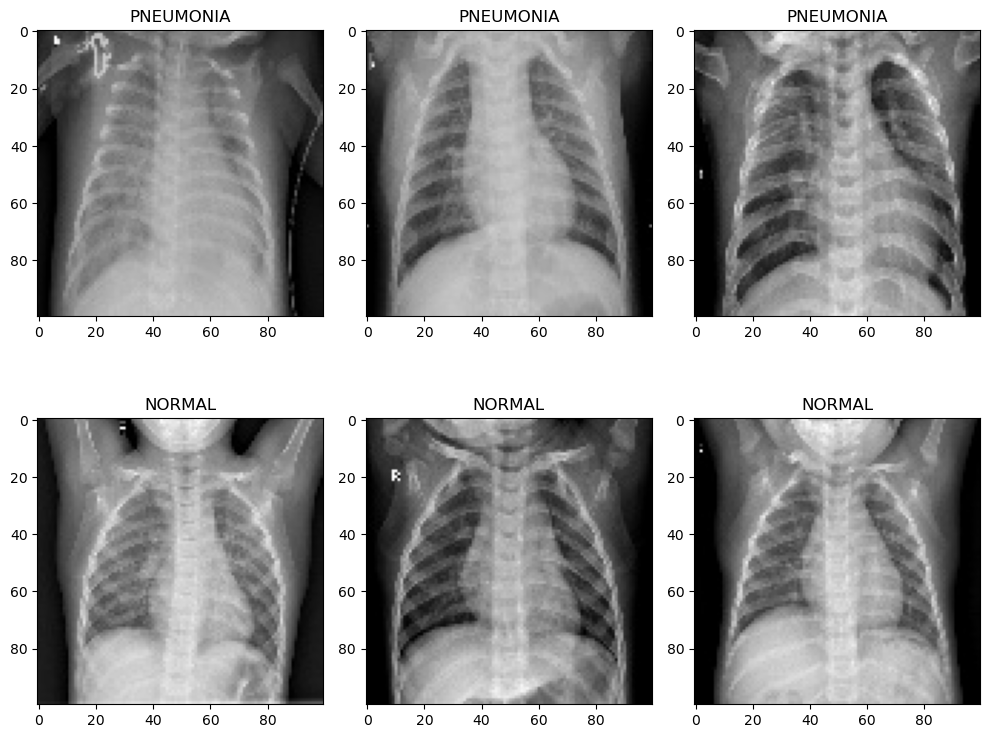

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

pre_img = 'preprocessed_images2' 
categories = ['PNEUMONIA', 'NORMAL']  

fig, axs = plt.subplots(2, 3, figsize=(10, 8))
axs = axs.ravel()

# Loop through each category and display a sample of images
for i, category in enumerate(categories):
    folder_path = os.path.join(pre_img, category)
    
    # Loop through each image in the folder
    for j, filename in enumerate(os.listdir(folder_path)):
        if j == 3:  # Display only the first 3 images in each folder
            break
            
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path) #, cv2.IMREAD_GRAYSCALE  # Load image in grayscale
        
        axs[i*3+j].imshow(image, cmap='gray')
        axs[i*3+j].set_title(category)
        
plt.tight_layout()
plt.show()


In [ ]:
# import cv2
# import os

# # set threshold value
# threshold_value = 150

# # loop through preprocessed images directory
# for filename in os.listdir(pre_img):
#     if filename.endswith('.jpeg'):
#         # read image
#         img = cv2.imread(os.path.join(pre_img, filename), cv2.IMREAD_GRAYSCALE)
        
#         # apply thresholding
#         _, thresholded_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
        
#         # save thresholded image
#         cv2.imwrite(os.path.join(pre_img, f'thresholded_{filename}'), thresholded_img)


Feature Extraction Method-1 <br>
HOG-`Histogram Oriented Gradient`

In [ ]:
from skimage import io
from skimage.feature import hog

preprocessed_folder_path = 'preprocessed_images2'

# Parameters of HOG function
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)
transform_sqrt = True
normalize = 'L2'

features1 = []
labels1 = []

label_dict = {'NORMAL': 0, 'PNEUMONIA': 1}

for folder in os.listdir(preprocessed_folder_path):
    folder_path = os.path.join(preprocessed_folder_path, folder)
    
    label = label_dict[folder]
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        image = skimage.io.imread(image_path)
        
        hog_features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                           cells_per_block=cells_per_block, transform_sqrt=transform_sqrt,
                           feature_vector=True, block_norm=normalize)
        
        features1.append(hog_features)
        labels1.append(label)
        
features1 = np.array(features1)
labels1 = np.array(labels1)


In [ ]:
## data of first ten images
for i in range(5):
    print("image-{}".format(i+1))
    print("Label: ", labels1[i])
    print("Features: ", features1[i][:70])
    print("_"*70)


image-1
Label:  0
Features:  [0.22717477 0.02936474 0.00623347 0.         0.00813937 0.00843766
 0.03864643 0.16787229 0.34951424 0.19559707 0.02326771 0.00256101
 0.         0.00793946 0.         0.06949438 0.09444256 0.10393114
 0.157629   0.01219312 0.03950071 0.02749098 0.02645891 0.06765647
 0.06825533 0.05430789 0.11405094 0.11998399 0.03132812 0.
 0.         0.00835557 0.00443373 0.04878503 0.20318125 0.36933274
 0.24315656 0.0225247  0.00559179 0.00541339 0.         0.00160449
 0.00418149 0.01252748 0.23733482 0.05560176 0.04126413 0.03803831
 0.02054205 0.00967492 0.07101098 0.03848117 0.03778193 0.06948597
 0.16379091 0.05141257 0.00116532 0.         0.01133979 0.
 0.04328685 0.1253029  0.40763902 0.21872463 0.00477456 0.00213429
 0.         0.00341071 0.         0.0138476 ]
______________________________________________________________________
image-2
Label:  0
Features:  [0.27981597 0.01246498 0.01827204 0.         0.01448639 0.01136345
 0.03962148 0.02384874 0.16026293 0.0

Feature Extraction Method-2 <br>
LBP- `Local Binary Pattern`

In [ ]:

from skimage import io
from skimage.feature import local_binary_pattern

preprocessed_folder_path = 'preprocessed_images2'

# Parameter of LBP
radius = 3
n_points = 8 * radius
method = 'uniform'

features2 = []
labels2 = []

label_dict = {'NORMAL': 0, 'PNEUMONIA': 1}

for folder in os.listdir(preprocessed_folder_path):
    folder_path = os.path.join(preprocessed_folder_path, folder)
    
    label = label_dict[folder]
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        image = skimage.io.imread(image_path, as_gray=True)
        
        # Extract the LBP features from the image
        lbp_features = local_binary_pattern(image, P=n_points, R=radius, method=method)
        lbp_features = np.histogram(lbp_features.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))[0]
        lbp_features = lbp_features / np.sum(lbp_features)
        
        features2.append(lbp_features)
        labels2.append(label)
        
features2 = np.array(features2)
labels2 = np.array(labels2)


In [ ]:
# for i in range(len(features2)):
#     print("Label: ", labels2[i])
#     print("Features: ", features2[i])


In [ ]:
## data of first three images
for i in range(3):
    print("image-{}".format(i+1))
    print("Label: ", labels2[i])
    print("Features: ", features2[2])
    print("-----------------------------")


image-1
Label:  0
Features:  [0.0418 0.0225 0.0218 0.015  0.013  0.0114 0.0125 0.013  0.015  0.0181
 0.0247 0.0437 0.0969 0.0534 0.0264 0.0149 0.0121 0.0112 0.0119 0.0128
 0.0133 0.0124 0.0128 0.0163 0.1185 0.3346]
-----------------------------
image-2
Label:  0
Features:  [0.0418 0.0225 0.0218 0.015  0.013  0.0114 0.0125 0.013  0.015  0.0181
 0.0247 0.0437 0.0969 0.0534 0.0264 0.0149 0.0121 0.0112 0.0119 0.0128
 0.0133 0.0124 0.0128 0.0163 0.1185 0.3346]
-----------------------------
image-3
Label:  0
Features:  [0.0418 0.0225 0.0218 0.015  0.013  0.0114 0.0125 0.013  0.015  0.0181
 0.0247 0.0437 0.0969 0.0534 0.0264 0.0149 0.0121 0.0112 0.0119 0.0128
 0.0133 0.0124 0.0128 0.0163 0.1185 0.3346]
-----------------------------


In [ ]:
# import numpy as np
# np.set_printoptions(threshold=np.inf)  # show all rows and columns
# print(features2)
# print('-'*50)
# print(labels2)


### Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, labels1, test_size=0.3, random_state=42)


#### Accuray for HOG method

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train1, y_train1)
accuracy = svm.score(X_test1, y_test1)

print("Accuracy of SVM classifier: {:.2f}%".format(accuracy * 100))


Accuracy of SVM classifier: 97.19%


In [ ]:
y_pred = svm.predict(X_test1)
print("Predicted labels: ", y_pred)


Predicted labels:  [1 0 1 ... 0 1 0]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the predicted labels
y_pred1 = svm.predict(X_test1)

# Calculate accuracy
accuracy = accuracy_score(y_test1, y_pred1)

# Calculate precision
precision = precision_score(y_test1, y_pred1)

# Calculate recall
recall = recall_score(y_test1, y_pred1)

# Calculate F1 score
f1 = f1_score(y_test1, y_pred1)

# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))


Accuracy: 97.19%
Precision: 97.83%
Recall: 98.34%
F1 Score: 98.08%


In [ ]:
# Split data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size=0.2, random_state=42)

#### Accuray for LBP method

In [ ]:
svm = SVC()
svm.fit(X_train2, y_train2)
accuracy = svm.score(X_test2, y_test2)

print("Accuracy of SVM classifier: {:.2f}%".format(accuracy * 100))


Accuracy of SVM classifier: 82.47%


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features2, labels2, test_size=0.2, random_state=42)

# Initialize SVM classifiers with different kernels
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_poly = SVC(kernel='poly')

# Train SVM classifiers on the training set
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

# Evaluate the performance of SVM classifiers on the testing set
accuracy_linear = svm_linear.score(X_test, y_test)
accuracy_rbf = svm_rbf.score(X_test, y_test)
accuracy_poly = svm_poly.score(X_test, y_test)

# Print the accuracies
print("Linear SVM accuracy:", accuracy_linear*100)
print("RBF SVM accuracy:", accuracy_rbf*100)
print("Polynomial SVM accuracy:", accuracy_poly*100)


Linear SVM accuracy: 96.455938697318
RBF SVM accuracy: 97.31800766283524
Polynomial SVM accuracy: 97.31800766283524


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained your SVM model and obtained predictions
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy*100)


Accuracy: 72.5095785440613
